Performing NLP tasks:

-Sentiment Scores

-WordClouds

-Fine tunning Distilbert on drug reviews dataset using Transfer Learning


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/NLP_DrugReviews/drug_reviews_sh.csv")
df.dropna(inplace=True)

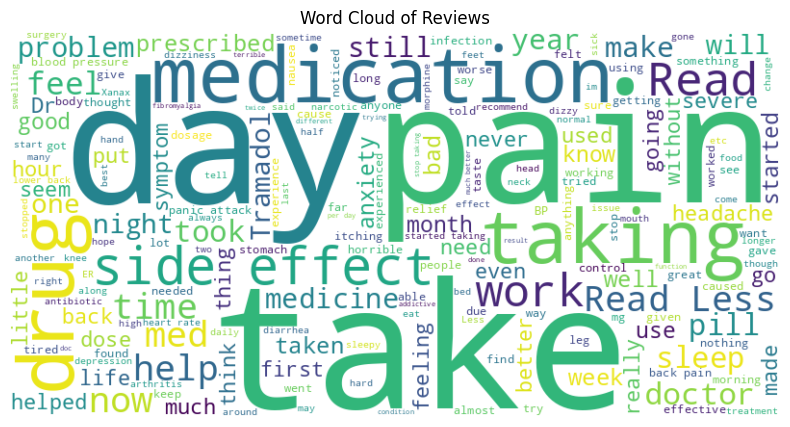

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all reviews into a single string
all_reviews = ' '.join(df['Review'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()


In [ ]:
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Split the reviews into words
words = all_reviews.split()

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Filter out stopwords
words = [word for word in words if word.lower() not in stop_words]

# Count the occurrences of each word
word_counts = Counter(words)

# Print the word counts
print("Word Counts:")
for word, count in word_counts.most_common(20):
    print(f"{word}: {count}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Word Counts:
pain: 3630
take: 3481
taking: 3206
side: 2114
Read: 2006
day: 1804
medication: 1784
drug: 1691
Less: 1507
get: 1493
like: 1481
back: 1344
feel: 1337
effects: 1136
2: 1097
days: 1047
one: 1045
I'm: 1006
took: 1005
would: 993


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Using VADER lexicon
nltk.download('vader_lexicon')


# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(text):
    sentiment_scores = sid.polarity_scores(text)
    # Return the compound score, which represents the overall sentiment
    return sentiment_scores['compound']

# Apply sentiment analysis on the 'Review' column
df['Sentiment_Score'] = df['Review'].apply(get_sentiment_score)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df['Sentiment_Score'].min()

-0.9978

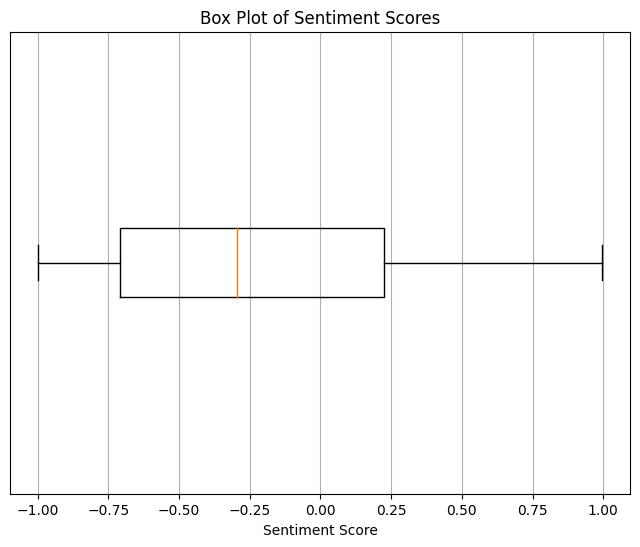

In [ ]:
import matplotlib.pyplot as plt

# Create a box plot for the sentiment scores
plt.figure(figsize=(8, 6))
plt.boxplot(df['Sentiment_Score'], vert=False)
plt.title('Box Plot of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.yticks([])
plt.grid(True)
plt.show()


<ipython-input-7-8025ea0f4b59>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Sentiment_Score'], shade=True)


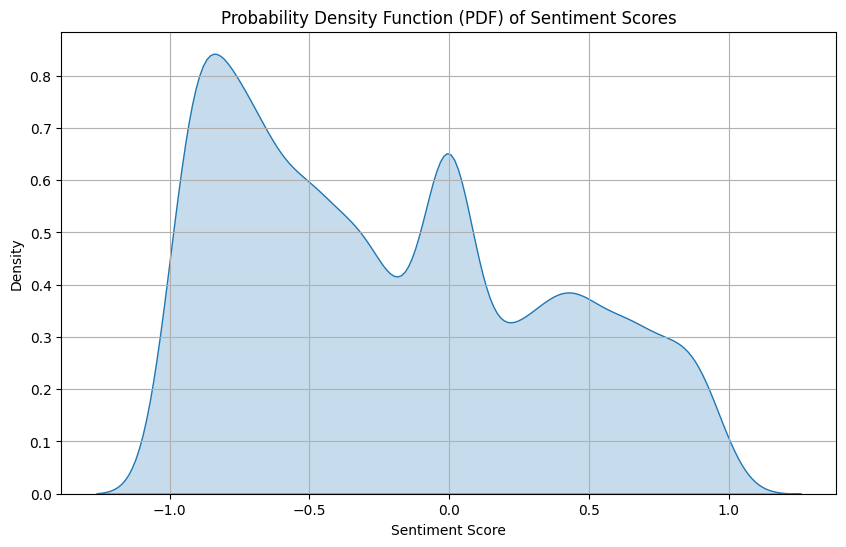

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a KDE plot for the sentiment scores
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Sentiment_Score'], shade=True)
plt.title('Probability Density Function (PDF) of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [ ]:
positive_count = df[df['Sentiment_Score'] > 0]['Sentiment_Score'].count()
negative_count = df[df['Sentiment_Score'] < 0]['Sentiment_Score'].count()
zero_count = df[df['Sentiment_Score'] == 0]['Sentiment_Score'].count()

print("Number of positive sentiment scores:", positive_count)
print("Number of negative sentiment scores:", negative_count)
print("Number of zero sentiment scores:", zero_count)

Number of positive sentiment scores: 3229
Number of negative sentiment scores: 6307
Number of zero sentiment scores: 926


In [ ]:
mean_sentiment_by_year = df.groupby('Year')['Sentiment_Score'].mean()
mean_sentiment_by_year

Year
2007   -0.182243
2008   -0.192488
2009   -0.201279
2010   -0.171815
2011   -0.239913
2012   -0.225393
2013   -0.232140
2014   -0.203104
2015   -0.276111
2016   -0.262423
2017   -0.223217
2018   -0.180535
2019   -0.194111
2020   -0.116391
2021   -0.222431
2022   -0.305760
2023   -0.174667
2024   -0.287667
Name: Sentiment_Score, dtype: float64

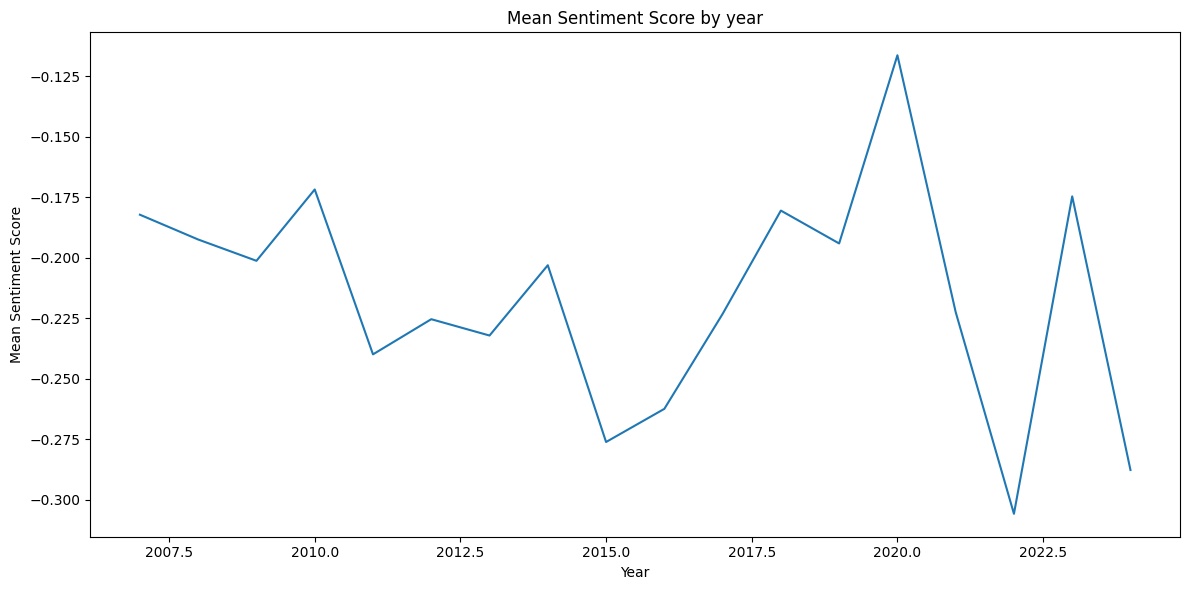

In [ ]:
# Create a bar plot
plt.figure(figsize=(12, 6))
mean_sentiment_by_year.plot()
plt.title('Mean Sentiment Score by year')
plt.xlabel('Year')
plt.ylabel('Mean Sentiment Score')

plt.tight_layout()
plt.show()

In [ ]:
mean_sentiment_by_drug = df.groupby('Drug')['Sentiment_Score'].mean()
mean_sentiment_by_drug

Drug
Acetaminophen            -0.198020
Alprazolam               -0.108659
Amoxicillin              -0.245966
Aspirin                  -0.025976
Azithromycin             -0.221120
Clonazepam               -0.127777
Codeine Sulfate          -0.077365
Famotidine               -0.042285
Hydroxyzine              -0.042733
Ibuprofen                -0.216758
Meloxicam                -0.261493
Methocarbamol            -0.171557
Metoclopramide           -0.360654
Metoprolol Succinate     -0.238534
Metoprolol Tartrate      -0.237142
Metoprolol Tetrate       -0.237142
Metronidazole            -0.252649
Morphine                 -0.253075
Penicillin V Potassium   -0.224049
Tramadol                 -0.254799
Warfarin                 -0.141953
Name: Sentiment_Score, dtype: float64

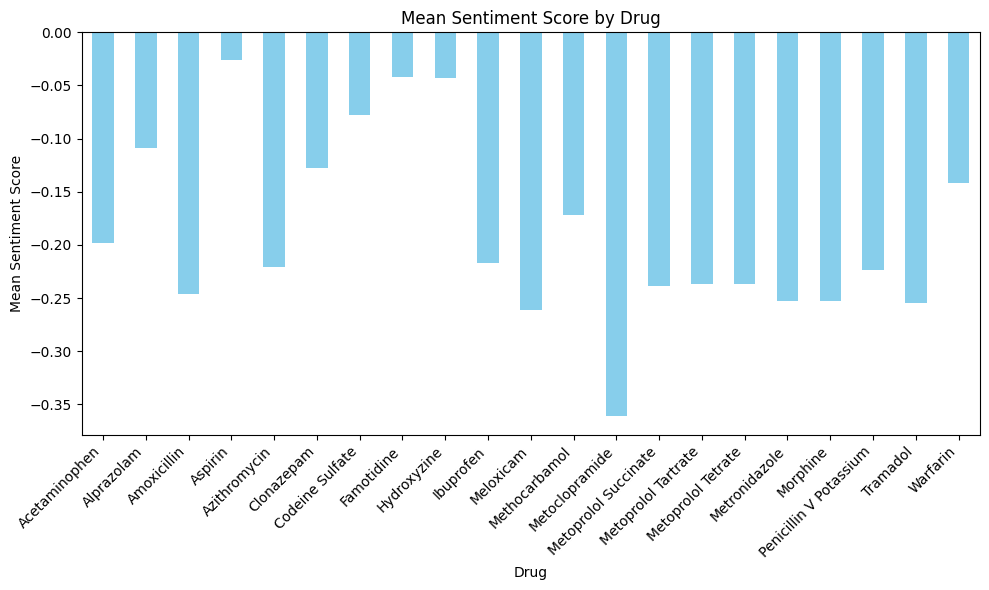

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
mean_sentiment_by_drug.plot(kind='bar', color='skyblue')
plt.title('Mean Sentiment Score by Drug')
plt.xlabel('Drug')
plt.ylabel('Mean Sentiment Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# To Investigate if there is a realationship between the mean rating and mean sentiment score within drugs, we can perform a correlation analysis

In [ ]:
mean_ratings_sentiments = df.groupby('Drug').agg({'Rating': 'mean', 'Sentiment_Score': 'mean'})
mean_ratings_sentiments

,Rating,Sentiment_Score
Drug,,
Acetaminophen,3.271717,-0.198020
Alprazolam,4.299649,-0.108659
Amoxicillin,3.022785,-0.245966
Aspirin,3.847059,-0.025976
Azithromycin,3.328044,-0.221120
Clonazepam,4.040383,-0.127777
Codeine Sulfate,3.829412,-0.077365
Famotidine,3.688136,-0.042285
Hydroxyzine,3.634134,-0.042733


In [ ]:
correlation = mean_ratings_sentiments.corr().iloc[0, 1]
print(f"Correlation between Mean Rating and Mean Sentiment Score: {correlation:.2f}")

Correlation between Mean Rating and Mean Sentiment Score: 0.70


In [ ]:
# Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = mean_ratings_sentiments['Rating'].values.reshape(-1, 1)
y = mean_ratings_sentiments['Sentiment_Score'].values
regression_model = LinearRegression()
regression_model.fit(X, y)
y_pred = regression_model.predict(X)

# Calculate R-squared
r_squared = r2_score(y, y_pred)
print(f"R-squared: {r_squared:.2f}")

R-squared: 0.49


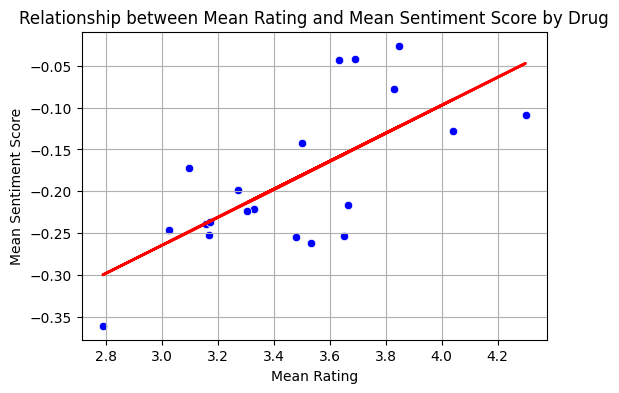

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=mean_ratings_sentiments, x='Rating', y='Sentiment_Score', color='blue')
plt.plot(X, y_pred, color='red', linewidth=2)  # Regression line
plt.title('Relationship between Mean Rating and Mean Sentiment Score by Drug')
plt.xlabel('Mean Rating')
plt.ylabel('Mean Sentiment Score')
plt.grid(True)
plt.show()

In [ ]:
# Now let's analyze ratings and sentiment scores within all conditions

In [ ]:
mean_ratings_sentiments_cond = df.groupby('Condition').agg({'Rating': 'mean', 'Sentiment_Score': 'mean'})
mean_ratings_sentiments_cond

,Rating,Sentiment_Score
Condition,,
A Feeling of Restlessness with Inability to Sit Still,4.035000,-0.013708
Abnormal Heart Rhythm,3.330851,-0.171914
Abnormal Increase in Ability of Blood to Clot,3.493750,0.175513
Abscess Within the Abdomen caused by Anaerobic Bacteria,3.000000,0.432100
Abscess Within the Abdomen caused by Peptostreptococcus,3.300000,0.945100
...,...,...
infection,3.940000,0.571540
infection caused by bacteria,2.960870,-0.204857
prevention of anginal chest pain associated with coronary artery disease,4.000000,0.226300


In [ ]:
# To have a smaller version on your specific condition you can change the term below
term = 'pain'
mean_ratings_sentiments_cond[mean_ratings_sentiments_cond.index.str.contains(term, case=False)]

,Rating,Sentiment_Score
Condition,,
Chronic Pain,3.516399,-0.266253
Chronic Pain with Narcotic Drug Tolerance,3.789189,-0.076043
"Disorder characterized by Stiff, Tender & Painful Muscles",3.701476,-0.170903
Head Pain,4.065385,-0.143862
Joint Damage causing Pain and Loss of Function,3.553585,-0.238740
Muscle Pain,3.025000,-0.272700
Neuropathic Pain,3.530108,-0.233648
Pain,3.455938,-0.275238
Pain associated with Arthritis,3.877778,-0.363756


In [ ]:
# Categorize sentiment scores with positive and negative lables for further model training purposes

def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Label'] = df['Sentiment_Score'].apply(categorize_sentiment)

In [ ]:
mean_positive_sentiment = df[df['Sentiment_Label'] == 'Positive']['Rating'].mean()
mean_negative_sentiment = df[df['Sentiment_Label'] == 'Negative']['Rating'].mean()
mean_neutral_sentiment = df[df['Sentiment_Label'] == 'Neutral']['Rating'].mean()

print("Mean Rating for positive labels:", mean_positive_sentiment)
print("Mean Rating for negative labels:", mean_negative_sentiment)
print("Mean Rating score for neutral labels:", mean_neutral_sentiment)

Mean Rating for positive labels: 3.9042737689687215
Mean Rating for negative labels: 3.3056128111622005
Mean Rating score for neutral labels: 3.25


In [ ]:
df['Condition'].unique()

array(['Joint Damage causing Pain and Loss of Function', 'Head Pain',
       'Pain', 'Painful Periods', 'Pain associated with Arthritis',
       'Backache', 'Other', 'Toothache', 'Fever', 'Muscle Pain',
       'Migraine Headache',
       'Joint Inflammatory Disease in Children and Young Adults', 'Gout',
       'Rheumatoid Arthritis',
       'Headache caused by Disorder of Cranial Blood Vessels',
       'Acute Infection of the Nose, Throat or Sinus',
       'infection caused by bacteria',
       'Throat Infection caused by Haemophilus Influenzae',
       'Middle Ear Infection', 'Strep Throat', 'Throat Irritation',
       'Chronic Bronchitis caused by Streptococcus Pneumoniae',
       'Infection of the Middle Ear caused by Streptococcus',
       'Acute Bacterial Infection of the Sinuses',
       'Infection of Genitals or Urinary Tract',
       'Infection of the Throat caused by Staphylococcus Bacteria',
       'Infection of the Middle Ear by H. Influenzae Bacteria',
       'Bacterial Inf

In [ ]:
df

,Drug,Review,Rating,Condition,Year,Sentiment_Score,Sentiment_Label
0,Acetaminophen,I have mild rheumatoid arthritis which has bee...,2.3,Joint Damage causing Pain and Loss of Function,2022,0.6700,Positive
1,Acetaminophen,"Besides relieving my pain, I FEEL better .. em...",5.0,Head Pain,2022,0.8316,Positive
2,Acetaminophen,I took Tylenol Extra Strength Caplets every 6 ...,5.0,Pain,2021,0.4014,Positive
3,Acetaminophen,I love this drug. I use it and within 15 minut...,5.0,Painful Periods,2021,0.9080,Positive
4,Acetaminophen,I accidentally took almost 6000 mg of this in ...,5.0,Head Pain,2020,0.2484,Positive
...,...,...,...,...,...,...,...
12260,Metoclopramide,I do not like the side effects of this drug.I ...,3.0,Nausea and Vomiting,2008,-0.6497,Negative
12261,Metoclopramide,This didn't work for me at all.,2.0,Feel Like Throwing Up,2007,0.0000,Neutral
12262,Metoclopramide,forget to take it 30 min. before eating,2.7,Condition in which Stomach Acid is Pushed Into...,2007,-0.2263,Negative
12263,Metoclopramide,This medication significantly helps with nause...,3.7,Stomach Muscle Paralysis and Decreased Function,2007,0.2263,Positive


In [ ]:
import torch
import torch.nn as nn
from transformers import DistilBertModel, DistilBertTokenizer

In [ ]:
# Load DistilBERT model and tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
num_classes = 3

# Define Sentiment Analysis model
class SentimentClassifier(nn.Module):
    def __init__(self, pretrained_model):
        super(SentimentClassifier, self).__init__()
        self.distilbert = pretrained_model
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.distilbert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        output = self.distilbert(input_ids=input_ids, attention_mask=attention_mask)[0]  # Only take the last hidden state
        output = self.drop(output[:, 0])  # Take the [CLS] token's representation (first token)
        return self.out(output)

In [ ]:
sentiment_model = SentimentClassifier(model)

In [ ]:
from sklearn.model_selection import train_test_split

X = df["Review"]
y = df["Sentiment_Label"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Appx Average lenght of reviews, to determine max_lengh size
import statistics

l =[]
for index, row in df.iterrows():
    l.append(len(row["Review"].split()))

statistics.mean(l)

51.86159434142611

In [ ]:
max_length = 128

# Tokenize input data for train and test sets
tokenized_train_texts = [tokenizer.tokenize(review)[:max_length] for review in X_train]
tokenized_test_texts = [tokenizer.tokenize(review)[:max_length] for review in X_test]

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode labels for train and test sets
label_encoder = LabelEncoder()
encoded_train_labels = label_encoder.fit_transform(y_train)
encoded_test_labels = label_encoder.fit_transform(y_test)

In [ ]:
# Convert tokens to input IDs for train and test sets
input_ids_train = [tokenizer.convert_tokens_to_ids(tokens) for tokens in tokenized_train_texts]
input_ids_test = [tokenizer.convert_tokens_to_ids(tokens) for tokens in tokenized_test_texts]

In [ ]:
from torch.nn.utils.rnn import pad_sequence

# Convert tokenized input sequences to PyTorch tensors
input_ids_train = [torch.tensor(ids) for ids in input_ids_train]
input_ids_test = [torch.tensor(ids) for ids in input_ids_test]

# Pad sequences for train and test sets
input_ids_train = pad_sequence(input_ids_train, batch_first=True, padding_value=0)
input_ids_test = pad_sequence(input_ids_test, batch_first=True, padding_value=0)

In [ ]:
# Create attention masks for train and test sets
attention_masks_train = torch.tensor([[float(i != 0) for i in ii] for ii in input_ids_train])
attention_masks_test = torch.tensor([[float(i != 0) for i in ii] for ii in input_ids_test])


In [ ]:
# Convert labels to tensors for train and test sets
labels_train = torch.tensor(encoded_train_labels)
labels_test = torch.tensor(encoded_test_labels)

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

batch_size = 64

# Create DataLoader for train and test sets
train_data = TensorDataset(input_ids_train, attention_masks_train, labels_train)
train_dataloader = DataLoader(train_data, batch_size=batch_size)

test_data = TensorDataset(input_ids_test, attention_masks_test, labels_test)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [ ]:
# Move model to device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sentiment_model.to(device)

SentimentClassifier(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (lin1

In [ ]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(sentiment_model.parameters(), lr=2e-5)

In [ ]:
from tqdm import tqdm

num_epochs = 3

# Training loop
for epoch in range(num_epochs):
    sentiment_model.train()  # Set model to training mode
    running_loss = 0.0

    # Wrap the train dataloader with tqdm
    with tqdm(train_dataloader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch') as t:
        for batch in t:
            # Move batch to device
            input_ids_batch, attention_masks_batch, labels_batch = [tensor.to(device) for tensor in batch]

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = sentiment_model(input_ids_batch, attention_masks_batch)
            loss = criterion(outputs, labels_batch)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            # Update running loss
            running_loss += loss.item() * input_ids_batch.size(0)

            # Update tqdm progress bar description with current loss
            t.set_postfix(loss=loss.item())

    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_dataloader.dataset)

    # Print epoch loss
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}")

print('Training finished!')


Epoch 1/3: 100%|██████████| 131/131 [01:16<00:00,  1.72batch/s, loss=0.522]


Epoch [1/3], Train Loss: 0.7016


Epoch 2/3: 100%|██████████| 131/131 [01:17<00:00,  1.69batch/s, loss=0.386]


Epoch [2/3], Train Loss: 0.4664


Epoch 3/3: 100%|██████████| 131/131 [01:19<00:00,  1.64batch/s, loss=0.241]

Epoch [3/3], Train Loss: 0.3277
Training finished!


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluation mode
sentiment_model.eval()

# Lists to store predictions and true labels
all_predictions = []
all_labels = []

# Disable gradient computation
with torch.no_grad():
    for batch in test_dataloader:
        # Move batch to device
        input_ids_batch, attention_masks_batch, labels_batch = [tensor.to(device) for tensor in batch]

        # Forward pass
        outputs = sentiment_model(input_ids_batch, attention_masks_batch)

        # Predict class probabilities
        _, predicted = torch.max(outputs, dim=1)

        # Collect predictions and true labels
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels_batch.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_predictions)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(all_labels, all_predictions, target_names=['class_0', 'class_1', 'class_2']))


Accuracy: 0.8285
Classification Report:
              precision    recall  f1-score   support

     class_0       0.86      0.88      0.87      1262
     class_1       0.89      0.64      0.75       185
     class_2       0.75      0.78      0.76       646

    accuracy                           0.83      2093
   macro avg       0.83      0.77      0.79      2093
weighted avg       0.83      0.83      0.83      2093



In [ ]:
# File path to save the model
model_path = "/content/drive/MyDrive/NLP_DrugReviews/drug_review_sentiment_model.pth"

# Save the model state dictionary to the file
torch.save(sentiment_model.state_dict(), model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/MyDrive/NLP_DrugReviews/drug_review_sentiment_model.pth


## Further notice: How to deal with class imbalance to improve model performance